# Loading DB

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()

In [3]:
X, y = digits.data, digits.target

In [4]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
X.shape

(1797, 64)

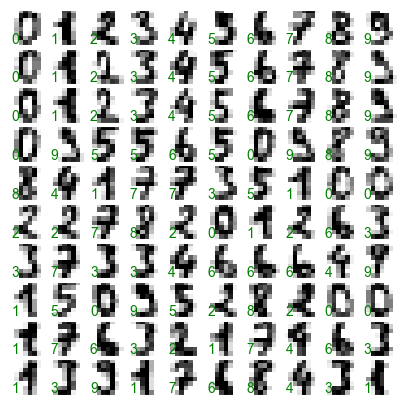

In [7]:
fig, axes = plt.subplots(10, 10, figsize=(5, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')


In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.7, random_state=41)

# Import data

In [9]:
import json
file_path = 'data.json'

with open(file_path, 'r') as f:
    data = json.load(f)

X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

X_train = np.array(data['X_train'])
y_train = np.array(data['y_train'])
X_test = np.array(data['X_test'])
y_test = np.array(data['y_test'])


print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1257, 64)
Shape of y_train: (1257,)
Shape of X_test: (540, 64)
Shape of y_test: (540,)


# Feature Selection

In [10]:
from sklearn.feature_selection import VarianceThreshold

## P = 0.8

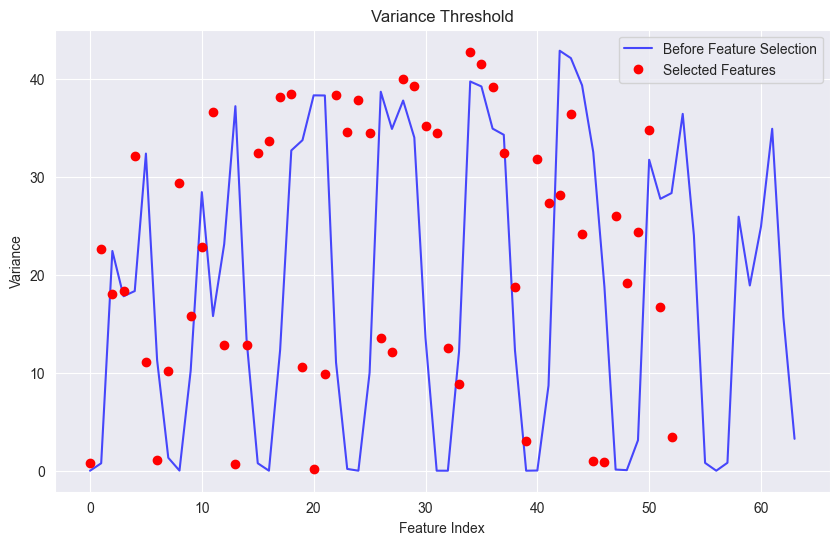

Number of selected features (VarianceThreshold): 53


In [11]:
# Calculate variances of features before feature selection
variances_before = np.var(X_train, axis=0)
# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_fs_p80 = sel.fit_transform(X)
# Calculate variances of features after feature selection
variances_after = np.var(X_fs_p80, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features 
num_selected_features = X_fs_p80.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

--------------------------------------------------------------------------------------------------------------------------------------------
The graph you provided is a visualization of the variance of features before and after applying feature selection using VarianceThreshold.

The x-axis represents the feature index, and the y-axis represents the variance. The blue line shows the variance of each feature before feature selection. The red circles show the variance of the features that were selected after applying the VarianceThreshold filter.

The code you provided calculates the variance of each feature before applying the filter (variances_before) and after applying the filter (variances_after). It then plots these variances on the same graph. The threshold used for the VarianceThreshold filter is not shown in the graph, but it determines which features are considered to have low variance and are removed.

----------------------------------------------------------------------------------------------------------------------------------------------

# Feature Extraction 

Number of PCA Components: 2
Mean CV Accuracy: 0.5414463066418373
Standard Deviation of CV Accuracy: 0.02206775586152763
Accuracy: 0.5503617139677239
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       178
           1       0.39      0.54      0.46       182
           2       0.53      0.72      0.61       177
           3       0.41      0.41      0.41       183
           4       0.88      0.89      0.89       181
           5       0.27      0.23      0.24       182
           6       0.80      0.83      0.82       181
           7       0.66      0.80      0.73       179
           8       0.30      0.06      0.10       174
           9       0.32      0.29      0.31       180

    accuracy                           0.55      1797
   macro avg       0.53      0.55      0.53      1797
weighted avg       0.53      0.55      0.53      1797



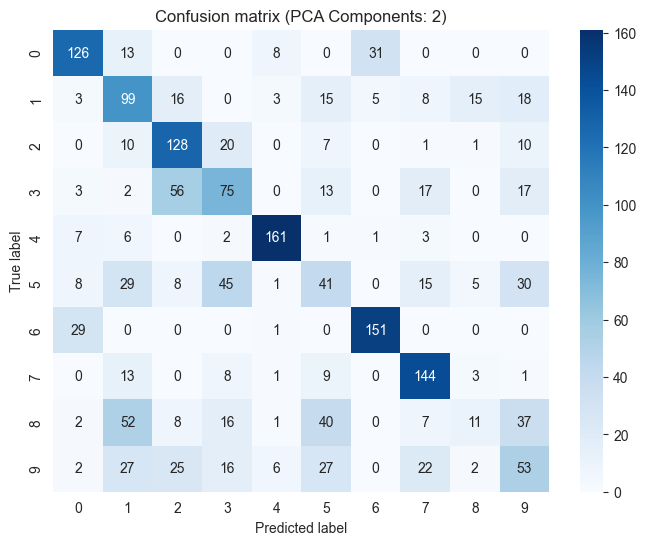

Number of PCA Components: 5
Mean CV Accuracy: 0.8108007448789571
Standard Deviation of CV Accuracy: 0.020043512788167014
Accuracy: 0.8191430161380078
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       178
           1       0.79      0.78      0.78       182
           2       0.83      0.77      0.80       177
           3       0.77      0.77      0.77       183
           4       0.94      0.96      0.95       181
           5       0.85      0.82      0.84       182
           6       0.95      0.97      0.96       181
           7       0.80      0.87      0.83       179
           8       0.62      0.58      0.60       174
           9       0.68      0.73      0.70       180

    accuracy                           0.82      1797
   macro avg       0.82      0.82      0.82      1797
weighted avg       0.82      0.82      0.82      1797



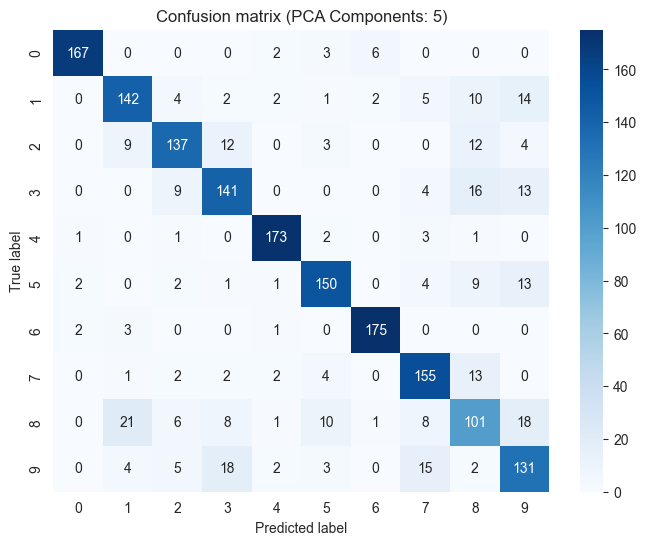

Number of PCA Components: 10
Mean CV Accuracy: 0.8876039726877716
Standard Deviation of CV Accuracy: 0.02157105242347261
Accuracy: 0.9048414023372288
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.84      0.86      0.85       182
           2       0.97      0.94      0.95       177
           3       0.85      0.83      0.84       183
           4       0.96      0.96      0.96       181
           5       0.96      0.93      0.94       182
           6       0.99      0.98      0.99       181
           7       0.94      0.97      0.96       179
           8       0.77      0.76      0.77       174
           9       0.79      0.82      0.80       180

    accuracy                           0.90      1797
   macro avg       0.91      0.90      0.90      1797
weighted avg       0.91      0.90      0.90      1797



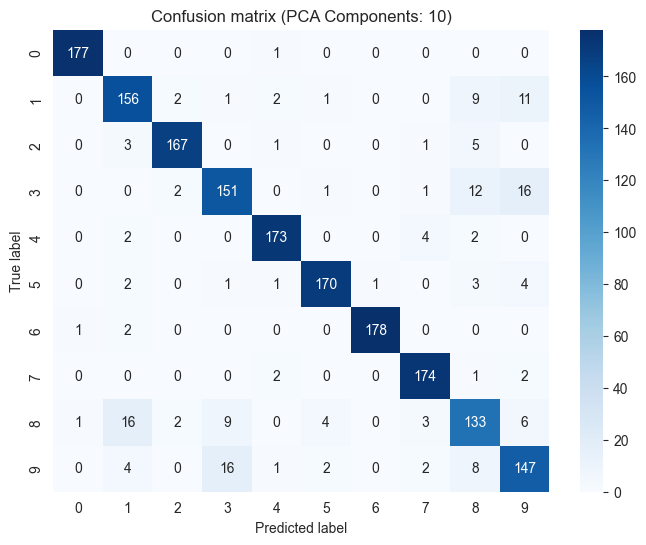

Number of PCA Components: 15
Mean CV Accuracy: 0.943792675356921
Standard Deviation of CV Accuracy: 0.01233646235714439
Accuracy: 0.9654980523094046
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       178
           1       0.92      0.96      0.94       182
           2       0.99      0.99      0.99       177
           3       0.99      0.95      0.97       183
           4       0.98      0.98      0.98       181
           5       0.97      0.97      0.97       182
           6       0.99      0.98      0.98       181
           7       0.99      0.99      0.99       179
           8       0.92      0.90      0.91       174
           9       0.92      0.94      0.93       180

    accuracy                           0.97      1797
   macro avg       0.97      0.97      0.97      1797
weighted avg       0.97      0.97      0.97      1797



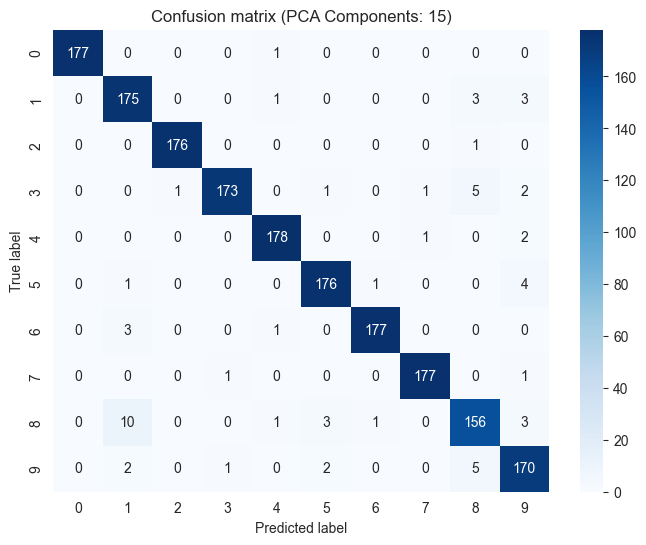

Number of PCA Components: 20
Mean CV Accuracy: 0.9521260086902543
Standard Deviation of CV Accuracy: 0.012829432235729389
Accuracy: 0.9816360601001669
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.95      0.97      0.96       182
           2       0.99      1.00      1.00       177
           3       1.00      0.97      0.99       183
           4       0.99      0.99      0.99       181
           5       0.98      0.98      0.98       182
           6       0.99      0.98      0.99       181
           7       0.99      0.99      0.99       179
           8       0.96      0.97      0.96       174
           9       0.96      0.96      0.96       180

    accuracy                           0.98      1797
   macro avg       0.98      0.98      0.98      1797
weighted avg       0.98      0.98      0.98      1797



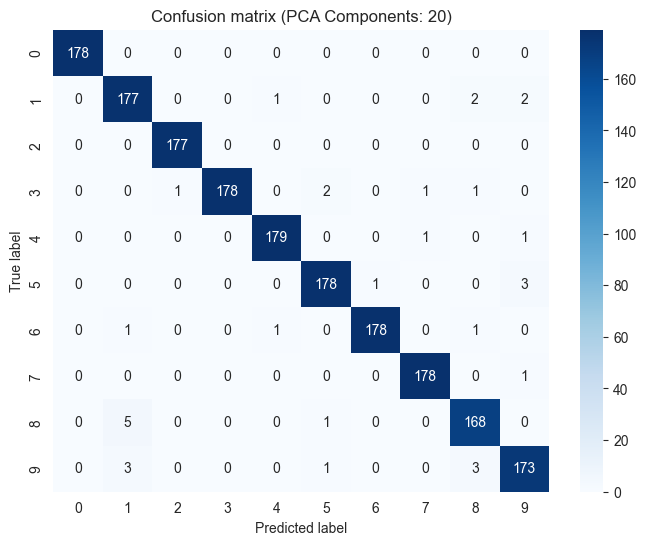

Number of PCA Components: 30
Mean CV Accuracy: 0.961030415890751
Standard Deviation of CV Accuracy: 0.014577920095584366
Accuracy: 0.9910962715637173
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.97      0.99      0.98       182
           2       1.00      1.00      1.00       177
           3       1.00      0.99      0.99       183
           4       1.00      1.00      1.00       181
           5       0.97      0.99      0.98       182
           6       1.00      1.00      1.00       181
           7       1.00      1.00      1.00       179
           8       0.98      0.97      0.97       174
           9       0.98      0.97      0.98       180

    accuracy                           0.99      1797
   macro avg       0.99      0.99      0.99      1797
weighted avg       0.99      0.99      0.99      1797



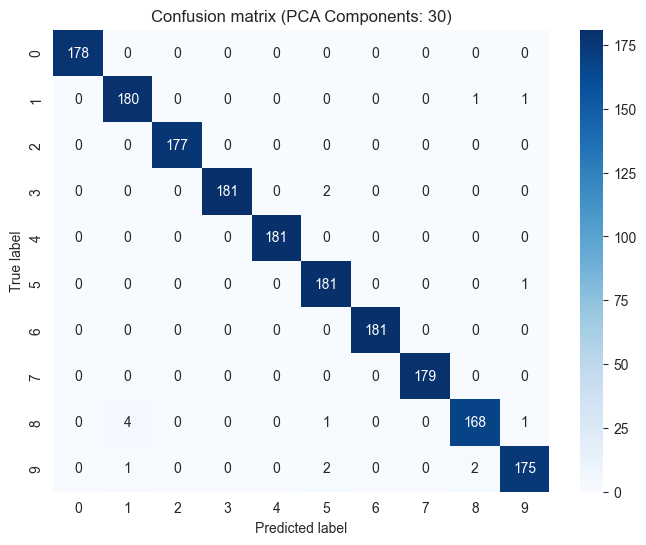

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, components, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(f'{title} (PCA Components: {components})')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=41)

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Apply VarianceThreshold feature selection to the whole dataset
X_fs_p80 = sel.transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_fs_p80)

# Define the number of components for PCA
n_components_list = [2, 5, 10, 15, 20, 30]

# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increased max_iter

for n_components in n_components_list:
    # Apply PCA to the standardized dataset
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Perform cross-validation on logistic regression model
    cv_scores = cross_val_score(logistic_model, X_pca, y, cv=kf)

    # Print the mean accuracy and standard deviation of cross-validation scores
    print(f"Number of PCA Components: {n_components}")
    print("Mean CV Accuracy:", np.mean(cv_scores))
    print("Standard Deviation of CV Accuracy:", np.std(cv_scores))

    # Fit the logistic regression model on the entire dataset
    logistic_model.fit(X_pca, y)

    # Make predictions on test data
    y_pred = logistic_model.predict(X_pca)

    # Evaluate the model
    print("Accuracy:", accuracy_score(y, y_pred))
    print("Classification Report:")
    print(classification_report(y, y_pred))

    # Plot confusion matrix
    plot_confusion_matrix(y, y_pred, digits.target_names, n_components)
